<a href="https://colab.research.google.com/github/Ryeongeun-Kim/personal_linear/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%B6%93%EA%BD%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **컴퓨터과학전공_202310905_김령은**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                320       
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 3)                 195       
                                                          

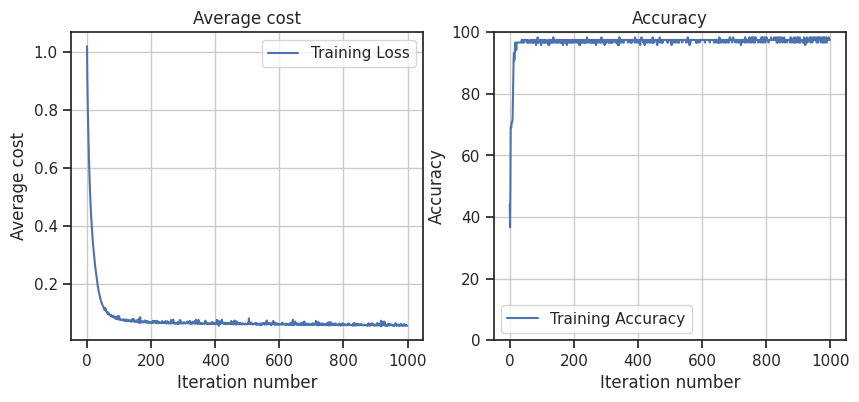

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris.info()
iris['species'].unique()
from sklearn.preprocessing import LabelEncoder

x = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.title('Average cost')
plt.xlabel('Iteration number')
plt.ylabel('Average cost')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot([100 * acc for acc in hist.history['accuracy']], label='Training Accuracy')
plt.ylim([0, 100])
plt.title('Accuracy')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()